In [1]:
import pickle
import numpy as np

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [3]:
svm_model, svm_ytest, svm_pred = pickle.load(open("svm.pkl", 'rb'))

In [4]:
print(accuracy_score(svm_ytest,svm_pred))
print(confusion_matrix(svm_ytest,svm_pred))
print(classification_report(svm_ytest,svm_pred))
print(recall_score(svm_ytest,svm_pred))
print(precision_score(svm_ytest,svm_pred))
print(f1_score(svm_ytest,svm_pred))

0.989
[[490   2]
 [  9 499]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       492
         1.0       1.00      0.98      0.99       508

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

0.9822834645669292
0.9960079840319361
0.9890981169474728


In [5]:
dt_model, dt_ytest, dt_pred = pickle.load(open("dt.pkl", 'rb'))

In [6]:
print(accuracy_score(dt_ytest,dt_pred))
print(confusion_matrix(dt_ytest,dt_pred))
print(classification_report(dt_ytest,dt_pred))
print(recall_score(dt_ytest,dt_pred))
print(precision_score(dt_ytest,dt_pred))
print(f1_score(dt_ytest,dt_pred))

0.983
[[487   5]
 [ 12 496]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       492
         1.0       0.99      0.98      0.98       508

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

0.9763779527559056
0.9900199600798403
0.9831516352824579


In [7]:
knn_model, knn_ytest, knn_pred = pickle.load(open("knn.pkl", 'rb'))

In [8]:
print(accuracy_score(knn_ytest,knn_pred))
print(confusion_matrix(knn_ytest,knn_pred))
print(classification_report(knn_ytest,knn_pred))
print(recall_score(knn_ytest,knn_pred))
print(precision_score(knn_ytest,knn_pred))
print(f1_score(knn_ytest,knn_pred))

0.989
[[489   3]
 [  8 500]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       492
         1.0       0.99      0.98      0.99       508

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

0.984251968503937
0.9940357852882704
0.9891196834817013


<b>Mask Detection using the best model</b>

In [9]:
import mask_detection

<b>Choosing the model type as classification or deep-learning. For classification, the model is also passed as parameter</b>

In [10]:
type= 'classification'
mask_detection.main(type, svm_model)

in camera class


0.9902912621359223
0.9864603481624759
0.9883720930232558


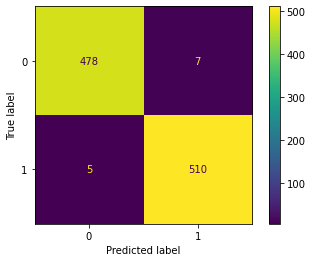

NameError: name 'test_x' is not defined

In [ ]:
dt_cm = confusion_matrix(dt_ytest,dt_pred)
svm_cm = confusion_matrix(svm_ytest,svm_pred)
knn_cm = confusion_matrix(knn_ytest,knn_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(svm_cm).plot()

In [ ]:
ConfusionMatrixDisplay(dt_cm).plot()

In [ ]:
ConfusionMatrixDisplay(knn_cm).plot()

In [ ]:
ConfusionMatrixDisplay(svm_cm).plot()